<font color='darkorange'>**This week, the output of cells under "Exercise Output" must be visible.**</font>

---

# Exercise

For these exercises, add your functions to the *apputil\.py* file. If you like, you're welcome to adjust the *app\.py* file, but it is not required.

## Exercise 1

Use Scikit-Learn and NumPy to write a function `kmeans(X, k)` that does the following:

- performs k-means clustering on a numerical NumPy array `X`
- returns a **tuple** `(centroids, labels)`, where
    - `centroids` is a 2D array of shape `(k, n_features)` containing the cluster centroids, and 
    - `labels` is a 1D array of shape `(n_samples,)` containing the index of the assigned cluster for each row of `X`.

In [8]:
# Exercise 1
import numpy as np
from sklearn.cluster import KMeans

def kmeans(X,k):

    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    
    centroids = model.cluster_centers_
    labels = model.labels_

    return centroids, labels

In [4]:
import numpy as np
import seaborn as sns
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

centroids, labels = kmeans(X, k=3)

# centroids[1] --> the centroid for the second cluster
# labels[2] --> the cluster assignment for the third data point

## Exercise 2

1. Somewhere in your *apputil\.py* file, [load](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) the `diamonds` dataset from the `seaborn` library.
2. Identify **just the numerical columns**, and save these (seven) columns in a dataframe as a global variable.
3. Write a function called `kmeans_diamonds(n, k)` that runs your `kmeans` function (from Exercise 1) to create `k` clusters on the first `n` rows of the (numeric) diamonds dataset.


In [ ]:
# Exercise 2
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

# Load diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Only keep numeric columns
numeric_diamonds = diamonds.select_dtypes(include=[np.number])

# Use kmeans function from exercise 1
def kmeans(X, k):
 
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)

    centroids = model.cluster_centers_
    labels = model.labels_

    return centroids, labels



# kmeans_diamonds(n, k)

def kmeans_diamonds(n, k):
    """
    Run k-means on the first n rows of the numeric diamonds data.

    Parameters
    ----------
    n : int
        Number of rows to include
    k : int
        Number of clusters
    
    Returns
    -------
    tuple (centroids, labels)
    """
    # Take first n rows and convert to NumPy array
    X = numeric_diamonds.iloc[:n].to_numpy()

    # Call the previously defined kmeans function
    return kmeans(X, k)

In [6]:
from apputil import numeric_diamonds
print(numeric_diamonds.shape)
print(numeric_diamonds.columns)

(53940, 7)
Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [7]:
centroids, labels = kmeans_diamonds(n=1000, k=5)

print("Centroids:\n", centroids)
print("Cluster labels (first 10):", labels[:10])

# centroids[3] --> the centroid for the fourth cluster
# labels[9] --> the cluster assignment for the tenth diamond

Centroids:
 [[7.48956916e-01 6.17079365e+01 5.78460317e+01 2.79698186e+03
  5.81895692e+00 5.81058957e+00 3.58750567e+00]
 [3.08444444e-01 6.19133333e+01 5.69766667e+01 5.54922222e+02
  4.33500000e+00 4.34233333e+00 2.68533333e+00]
 [2.61666667e-01 6.16633333e+01 5.79666667e+01 3.44333333e+02
  4.09466667e+00 4.11200000e+00 2.53000000e+00]
 [7.70586797e-01 6.17163814e+01 5.77694377e+01 2.86234474e+03
  5.87168704e+00 5.85951100e+00 3.62000000e+00]
 [2.73666667e-01 6.15166667e+01 5.76666667e+01 4.03300000e+02
  4.17566667e+00 4.20000000e+00 2.57600000e+00]]
Cluster labels (first 10): [2 2 2 2 2 2 2 2 2 2]


## Exercise 3

Write a function called `kmeans_timer(n, k, n_iter=5)` that does the following:

- runs the function `kmeans_diamonds(n, k)` exactly `n_iter` times, and saves the runtime for each run.
- returns the *average* time across the `n` runs, where "time" is in seconds.

As a starting point, consider the following snippet:

In [9]:
# Exercise 3
from time import time
from apputil import kmeans_diamonds

def kmeans_timer(n, k, n_iter=5):
    """
    Run kmeans_diamonds(n, k) exactly n_iter times and
    return the average runtime in seconds.
    n = # of rows from dataset, k = # of clusters, n_iter = # of iterations
    """
    times = []

    for _ in range(n_iter):
        start = time()
        _ = kmeans_diamonds (n, k)
        elapsed = time() - start
        times.append(elapsed)

    return sum(times) / len(times)

In [10]:
from time import time

def my_func(x):
    return x + 1

start = time()  # capture the time
_ = my_func(1)  # ... do something
t = time() - start  # calculate the runtime

## Exercise Output

<font color='darkorange'>The output of the following cells must be visible.</font>

Run the following cells, and consider the time complexity for k-Means clustering with respect to the number of samples `n` and the number of clusters `k`.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

from apputil import *

%config InlineBackend.figure_formats = ['svg']
sns.set_theme(style="whitegrid")

In [12]:
# this might take a minute or so ...
n_values = np.arange(100, 50000, 1000)
k5_times = [kmeans_timer(n, 5, 20) for n in n_values]

In [13]:
# this should be slightly faster
k_values = np.arange(2, 50)
n10k_times = [kmeans_timer(10000, k, 10) for k in k_values]

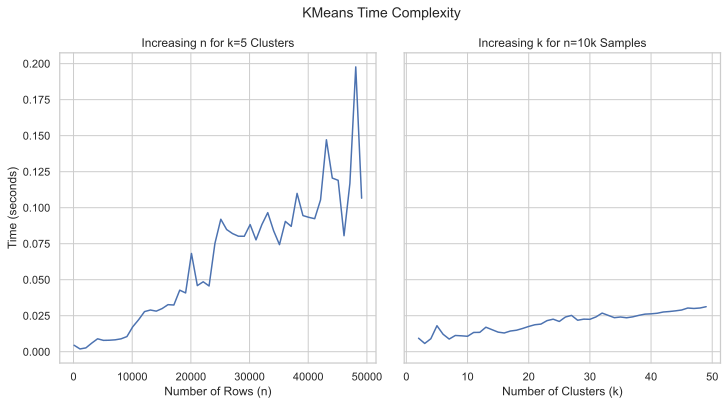

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.tight_layout()
fig.suptitle("KMeans Time Complexity", y=1.08, fontsize=14)

sns.lineplot(x=n_values, y=k5_times, ax=axes[0])
axes[0].set_xlabel("Number of Rows (n)")
axes[0].set_ylabel("Time (seconds)")
axes[0].set_title('Increasing n for k=5 Clusters')

sns.lineplot(x=k_values, y=n10k_times, ax=axes[1])
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_title('Increasing k for n=10k Samples');

## Bonus

Consider the following algorithm.

- Modify the code to *count* the number of computational steps taken, saved in a global variable `step_count`.
- Illustrate how this metric changes as $n\to\infty$ (consider the "worst case scenario").
- Estimate the time complexity of this algorithm using $O$-notation, and show it in a plot.
    - Refer to Chapter 11 in the Guttag book for more on asymptotic $O$-notation.

*Note: in this exercise, we are counting *steps*, not time.*

In [ ]:
def bin_search(n):
    arr = np.arange(n)
    left = 0
    right = n-1

    x = n-1

    while left <= right:
        middle = left + (right - left) // 2

        # check if x is present at mid
        if (arr[middle] == x):
            return middle

        # if x greater, ignore left half
        if (arr[middle] < x):
            left = middle + 1

        # if x is smaller, ignore right half
        else:
            right = middle - 1

    # if we reach here, then element was not present
    return -1